#Sklearn Implementation (Wine Dataset)

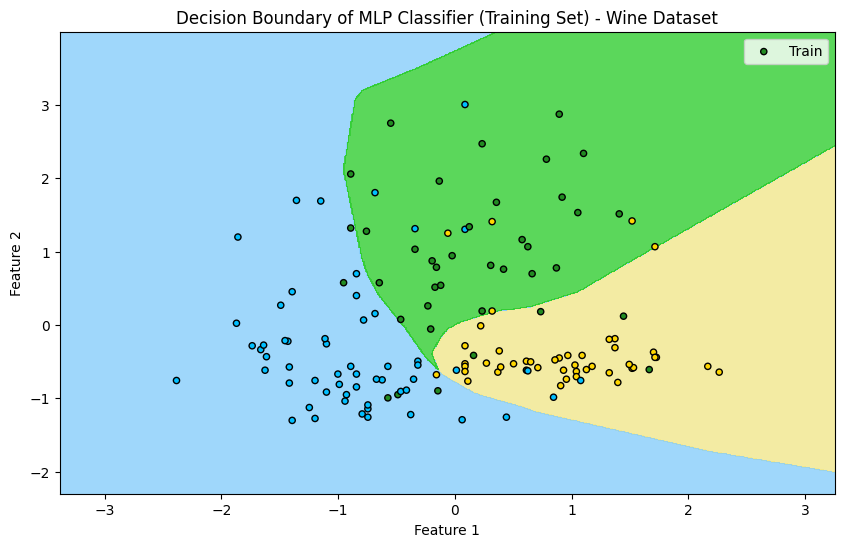

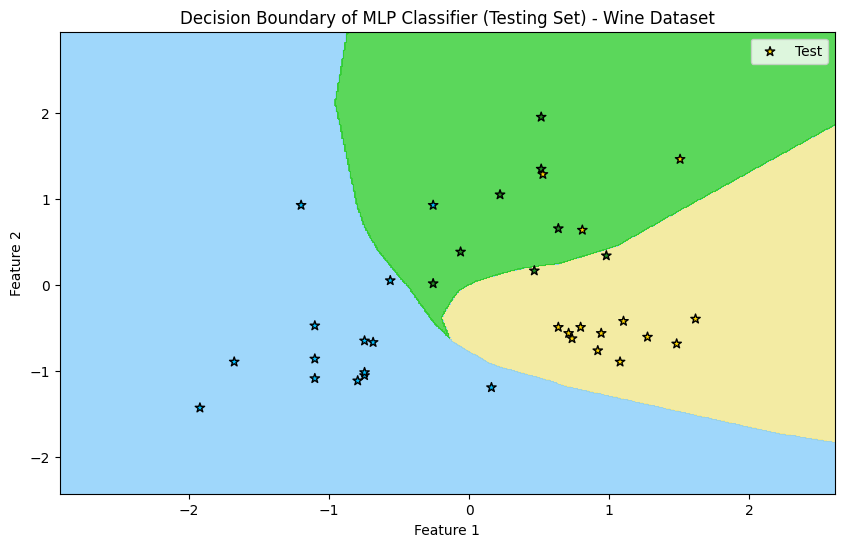

In [ ]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# Load the Wine dataset
data = load_wine()
X = data.data[:, :2]  # Use the first two features for 2D visualization
y = data.target  # Target labels

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, random_state=42)

# Train the MLP classifier
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Plot decision boundaries for training set
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_train = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_train = Z_train.reshape(xx.shape)

# Define new color maps
cmap_light = ListedColormap(['#F0E68C', '#87CEFA', '#32CD32'])
cmap_bold = ListedColormap(['#FFD700', '#00BFFF', '#228B22'])

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_train, alpha=0.8, cmap=cmap_light)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cmap_bold, edgecolor='k', s=20, label='Train')
plt.title("Decision Boundary of MLP Classifier (Training Set) - Wine Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

# Plot decision boundaries for testing set
x_min, x_max = X_test[:, 0].min() - 1, X_test[:, 0].max() + 1
y_min, y_max = X_test[:, 1].min() - 1, X_test[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z_test = mlp.predict(np.c_[xx.ravel(), yy.ravel()])
Z_test = Z_test.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z_test, alpha=0.8, cmap=cmap_light)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cmap_bold, edgecolor='k', s=50, label='Test', marker='*')
plt.title("Decision Boundary of MLP Classifier (Testing Set) - Wine Dataset")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8333333333333334

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.81        14
           1       1.00      0.93      0.96        14
           2       0.60      0.75      0.67         8

    accuracy                           0.83        36
   macro avg       0.82      0.82      0.81        36
weighted avg       0.85      0.83      0.84        36



#Keras Implementation (Wine Dataset)

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert labels to categorical (One-Hot Encoding)
y = to_categorical(y, num_classes=3)  # 3 classes in the Wine dataset

# Split the dataset into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data (normalize features)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Input layer
    Dense(16, activation='relu'),  # Hidden layer
    Dense(3, activation='softmax')  # Output layer with 3 neurons (multi-class classification)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test), verbose=1)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.3066 - loss: 1.3579 - val_accuracy: 0.4167 - val_loss: 1.0558
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5203 - loss: 0.9760 - val_accuracy: 0.5833 - val_loss: 0.8548
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6097 - loss: 0.8018 - val_accuracy: 0.7222 - val_loss: 0.6927
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7235 - loss: 0.6658 - val_accuracy: 0.8611 - val_loss: 0.5715
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8218 - loss: 0.5142 - val_accuracy: 0.9444 - val_loss: 0.4763
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9348 - loss: 0.4493 - val_accuracy: 0.9444 - val_loss: 0.3894
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9730 - loss: 0.3336 - val_accuracy: 0.9722 - val_loss: 0.3136
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9878 - loss: 0.2583 - val_accuracy: 1.0000 - val_loss: 0.2432
Ep

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 1.0000 - loss: 0.0024
Test Loss: 0.0024
Test Accuracy: 1.0000


In [ ]:
# Predict on test data
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



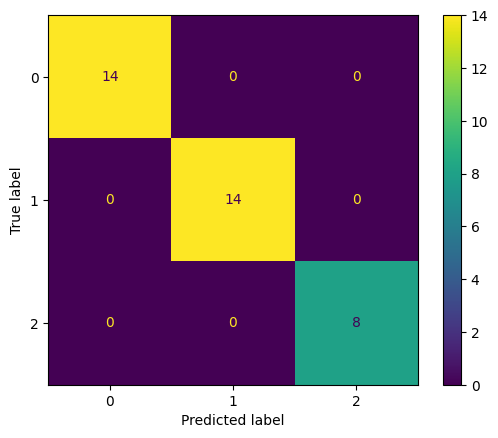

In [ ]:
# Display classification report
print(classification_report(y_test_classes, y_pred_classes))

# Show confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test_classes, y_pred_classes)
plt.show()

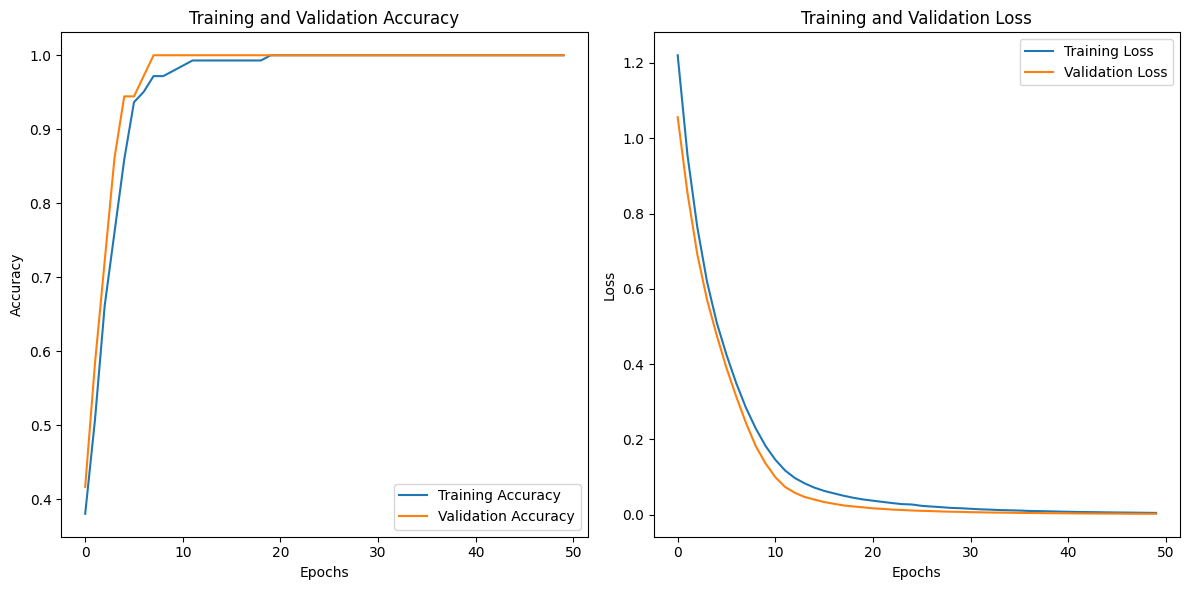

In [ ]:
# Step 9: Plot Training and Validation Loss/Accuracy
# Extract metrics from the history object (collected during training)
acc = history.history['accuracy']        # Training accuracy
val_acc = history.history['val_accuracy']  # Validation accuracy
loss = history.history['loss']           # Training loss
val_loss = history.history['val_loss']   # Validation loss

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Create the first subplot for accuracy
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')  # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Accuracy')                         # Label the y-axis
plt.legend()                                   # Add a legend

# Plot Loss
plt.subplot(1, 2, 2)  # Create the second subplot for loss
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')      # Add a title
plt.xlabel('Epochs')                           # Label the x-axis
plt.ylabel('Loss')                             # Label the y-axis
plt.legend()                                   # Add a legend

# Adjust layout to prevent overlap and display the plots
plt.tight_layout()
plt.show()

#Back Propogation (Wine dataset)

Epoch 0, Loss: 0.5701
Epoch 50, Loss: 0.1756
Epoch 100, Loss: 0.1136
Epoch 150, Loss: 0.0860
Epoch 200, Loss: 0.0707
Epoch 250, Loss: 0.0607
Epoch 300, Loss: 0.0537
Epoch 350, Loss: 0.0482
Epoch 400, Loss: 0.0440
Epoch 450, Loss: 0.0406


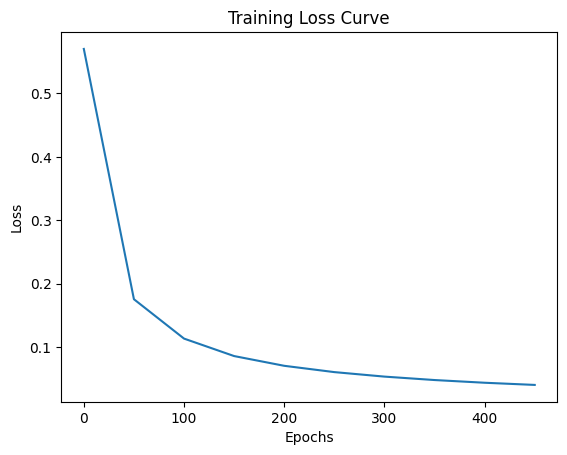

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Wine dataset
wine = load_wine()
X = wine.data  # Features
y = wine.target  # Labels

# Convert labels to one-hot encoding
y_one_hot = np.zeros((y.size, y.max() + 1))
y_one_hot[np.arange(y.size), y] = 1

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

# Normalize the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize network parameters
input_neurons = X_train.shape[1]
hidden_neurons = 8
output_neurons = 3
np.random.seed(42)
weights_input_hidden = np.random.randn(input_neurons, hidden_neurons)
weights_hidden_output = np.random.randn(hidden_neurons, output_neurons)
bias_hidden = np.zeros((1, hidden_neurons))
bias_output = np.zeros((1, output_neurons))
learning_rate = 0.01
epochs = 500
losses = []

# Activation function and derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training loop
for epoch in range(epochs):
    # Forward pass
    hidden_layer_input = np.dot(X_train, weights_input_hidden) + bias_hidden
    hidden_layer_output = sigmoid(hidden_layer_input)
    final_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
    final_output = sigmoid(final_layer_input)

    # Compute error
    error = y_train - final_output

    # Backpropagation
    d_output = error * sigmoid_derivative(final_output)
    error_hidden = d_output.dot(weights_hidden_output.T)
    d_hidden = error_hidden * sigmoid_derivative(hidden_layer_output)

    # Update weights and biases
    weights_hidden_output += hidden_layer_output.T.dot(d_output) * learning_rate
    weights_input_hidden += X_train.T.dot(d_hidden) * learning_rate
    bias_output += np.sum(d_output, axis=0, keepdims=True) * learning_rate
    bias_hidden += np.sum(d_hidden, axis=0, keepdims=True) * learning_rate

    # Store loss every 50 epochs
    if epoch % 50 == 0:
        loss = np.mean(np.abs(error))
        losses.append(loss)
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

# Testing the network
hidden_layer_input = np.dot(X_test, weights_input_hidden) + bias_hidden
hidden_layer_output = sigmoid(hidden_layer_input)
final_layer_input = np.dot(hidden_layer_output, weights_hidden_output) + bias_output
final_output = sigmoid(final_layer_input)

predictions = np.argmax(final_output, axis=1)
y_true = np.argmax(y_test, axis=1)

# Plot training loss curve
plt.plot(range(0, epochs, 50), losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Curve')
plt.show()